## SVM Kernel Implementation

In [52]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5.0,5.0,100)
y= np.sqrt(10**2-x**2)
x=np.hstack([x,-x])
y=np.hstack([y,-y])

In [53]:
x1=np.linspace(-5.0,5.0,100)
y1= np.sqrt(5**2-x1**2)
x1=np.hstack([x1,-x1])
y1=np.hstack([y1,-y1])

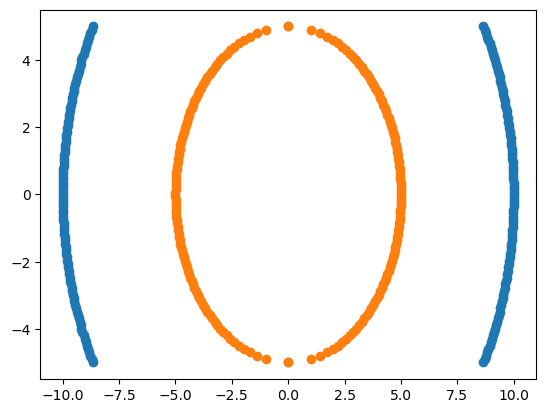

In [54]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [55]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=df1.append(df2)
df.head()

/tmp/ipykernel_3625/1188565322.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [56]:
df2.head()

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1


In [57]:
#Based on the formula find the features for the polynomial kernel

In [58]:
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2

In [59]:
df.head()

,X1,X2,Y,X1_square,X2_square
0,8.660254,-5.00000,0,75.000000,25.000000
1,8.717792,-4.89899,0,75.999898,24.000102
2,8.773790,-4.79798,0,76.979390,23.020610
3,8.828277,-4.69697,0,77.938476,22.061524
4,8.881281,-4.59596,0,78.877155,21.122845


In [60]:
df['X1*X2']=df['X1']*df['X2']

In [61]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [62]:
#Independent features and dependentent features
X=df[['X1_square','X2_square','X1*X2']]
y=df['Y']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
!pip install plotly

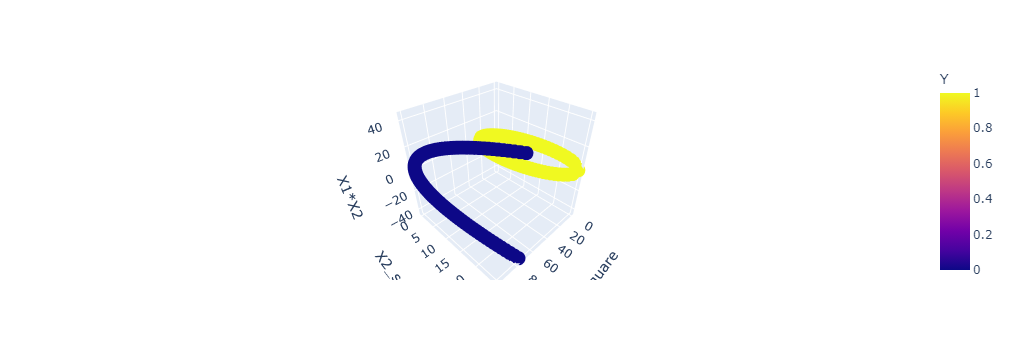

In [66]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


In [68]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [75]:
X=df.iloc[:,0:2]
y=df['Y']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [77]:
classifier=SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [79]:
classifier=SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.51
